In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge # type: ignore
from sklearn.ensemble import RandomForestRegressor # type: ignore
from sklearn.metrics import mean_squared_error, r2_score # type: ignore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
bic = pd.read_excel(R"../data/cleaned.xlsx")
bic.head()

,id,year,date,birth_year,employee_code,plan_name,disease_date,damage_date,disease_type,Z_Log_Paid,...,disease_group_Dental Services,disease_group_Orthotics,disease_group_Other Paraclinical,disease_group_Outpatient Minor Procedure Costs,disease_group_Paraclinical (Group 1),disease_group_Paraclinical (Group 2),disease_group_Visit and Medication,disease_type_target,age_std,plan_std
0,1,401-402,1401/09/10,1363,461415,4,1401/09/05,1401/09/06,Medication Costs,-2.971719,...,False,False,False,False,False,False,True,-0.315308,0.234850,0.731123
1,2,401-402,1401/09/10,1363,461415,4,1401/09/05,1401/09/06,Visit Costs,-0.560214,...,False,False,False,False,False,False,True,-0.437879,0.234850,0.731123
2,3,401-402,1401/09/13,1340,461421,4,1401/09/03,1401/09/11,Other Outpatient Minor Procedures,1.020893,...,False,False,False,True,False,False,False,0.319891,1.467121,0.731123
3,4,401-402,1401/09/13,1340,461421,4,1401/09/03,1401/09/11,Various Endoscopy and Colonoscopy,1.460613,...,False,False,False,False,True,False,False,1.393914,1.467121,0.731123
4,5,401-402,1401/09/13,1340,461421,4,1401/09/03,1401/09/11,Visit Costs,-1.247993,...,False,False,False,False,False,False,True,-0.437879,1.467121,0.731123


In [2]:
def extract_first_year(year_range):
    if isinstance(year_range, str):
        return year_range.split('-')[0]
    return year_range

bic['FirstYear'] = bic["birth_year"].apply(extract_first_year)

In [3]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

bic['FirstYear_Standardized'] = scaler.fit_transform(bic[['FirstYear']])

In [4]:

columnss = ["age_std", "plan_std", "disease_type_target", "Z_Log_Announced"]
columnss += [col for col in bic.columns if col.startswith('Disease_Group_') or col.startswith('Relation_') or col.startswith('Company_') or col.startswith('Document_type')]
colu = bic[columnss] 
help = bic["Z_Log_Paid"]              

colu_train, colu_test, help_train, help_test = train_test_split(colu, help, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0) 


ridge.fit(colu_train, help_train)


help_pred = ridge.predict(colu_test)

mse = mean_squared_error(help_test, help_pred)
r2ridge = r2_score(help_test, help_pred)

print("Ridge Regression Results:")
print("MSE:", mse)
print("R²:", r2ridge)

Ridge Regression Results:
MSE: 0.07632445283427662
R²: 0.9234143838505247


In [5]:
colu = bic[columnss]
help = bic["Z_Log_Paid"]                 


coulo_train, coulu_test, help_train, help_test = train_test_split(colu, help, test_size=0.2, random_state=42)


rf = RandomForestRegressor(n_estimators=100, random_state=42)


rf.fit(coulo_train, help_train)


help_pre = rf.predict(coulu_test)

mse = mean_squared_error(help_test, help_pre)
Randomforest = r2_score(help_test, help_pre)

print("Random Forest Results:")
print("MSE:", mse)
print("R²:", Randomforest)

Random Forest Results:
MSE: 0.04584680104061263
R²: 0.9539963225966177


In [6]:
colu = bic[columnss] 
help = bic["Z_Log_Paid"]            



colu_train, colu_test, help_train, help_test = train_test_split(colu, help, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(colu_train, help_train)

help_pred = lr.predict(colu_test)

mse = mean_squared_error(help_test, help_pred)
r2liner = r2_score(help_test, help_pred)

print("Linear Regression Results:")
print("MSE:", mse)
print("R²:", r2liner)


Linear Regression Results:
MSE: 0.07632450539694674
R²: 0.9234143311079981


C:\Users\acer\AppData\Local\Temp\ipykernel_16380\84389323.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_r2, x="Model", y="R2_Score", palette="viridis")


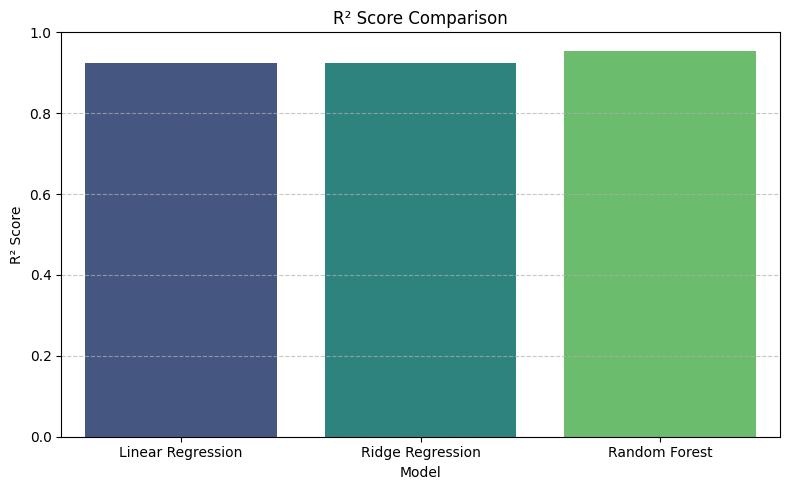

In [7]:
r2_scores = {
    "Linear Regression": r2liner,
    "Ridge Regression":  r2ridge,
    "Random Forest":     Randomforest
}

import pandas as pd
df_r2 = pd.DataFrame(list(r2_scores.items()), columns=["Model", "R2_Score"])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_r2, x="Model", y="R2_Score", palette="viridis")

plt.title("R² Score Comparison")
plt.ylim(0, 1)
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()